In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import datetime

In [2]:
data = pd.read_csv("training.csv")

C:\Users\luoha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Occur Date,Neighborhood,UCR Literal,Day,Occur Time,Latitude,Longitude,UCR #,IBR Code,zipcode
0,2009/1/1,Greenbriar,LARCENY-NON VEHICLE,Thursday,11:45,33.68845,-84.49328,630,2303,30344
1,2009/1/1,Downtown,LARCENY-NON VEHICLE,Thursday,12:45,33.75320,-84.39201,630,2303,30303
2,2009/1/1,Adamsville,LARCENY-NON VEHICLE,Thursday,13:45,33.75735,-84.50282,630,2303,30311
3,2009/1/1,Lenox,LARCENY-NON VEHICLE,Thursday,14:45,33.84676,-84.36212,630,2303,30326
4,2009/1/1,Greenbriar,LARCENY-NON VEHICLE,Thursday,15:45,33.68677,-84.49773,630,2303,30344


In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
print(data.shape)
print(data.head())

(317904, 10)
                              Occur Date Neighborhood          UCR Literal  \
1970-01-01 00:00:00.000000000   2009/1/1   Greenbriar  LARCENY-NON VEHICLE   
1970-01-01 00:00:00.000000001   2009/1/1     Downtown  LARCENY-NON VEHICLE   
1970-01-01 00:00:00.000000002   2009/1/1   Adamsville  LARCENY-NON VEHICLE   
1970-01-01 00:00:00.000000003   2009/1/1        Lenox  LARCENY-NON VEHICLE   
1970-01-01 00:00:00.000000004   2009/1/1   Greenbriar  LARCENY-NON VEHICLE   

                                    Day Occur Time  Latitude  Longitude  \
1970-01-01 00:00:00.000000000  Thursday      11:45  33.68845  -84.49328   
1970-01-01 00:00:00.000000001  Thursday      12:45  33.75320  -84.39201   
1970-01-01 00:00:00.000000002  Thursday      13:45  33.75735  -84.50282   
1970-01-01 00:00:00.000000003  Thursday      14:45  33.84676  -84.36212   
1970-01-01 00:00:00.000000004  Thursday      15:45  33.68677  -84.49773   

                               UCR # IBR Code zipcode  
1970-01-01 

# Basic Visulization
# Frequency of Crimes Types from 2009 to 2018

In [6]:
s_crime_type = data[['UCR Literal']]

In [7]:
s_crime_type.head()

,UCR Literal
1970-01-01 00:00:00.000000000,LARCENY-NON VEHICLE
1970-01-01 00:00:00.000000001,LARCENY-NON VEHICLE
1970-01-01 00:00:00.000000002,LARCENY-NON VEHICLE
1970-01-01 00:00:00.000000003,LARCENY-NON VEHICLE
1970-01-01 00:00:00.000000004,LARCENY-NON VEHICLE


In [8]:
crime_types_count = pd.DataFrame(s_crime_type.groupby('UCR Literal').size().sort_values(ascending=False).rename('type_counts').reset_index())

In [9]:
np.flip(np.array(crime_types_count['UCR Literal']),axis = 0).tolist()

['MANSLAUGHTER',
 'HOMICIDE',
 'ROBBERY-RESIDENCE',
 'ROBBERY-COMMERCIAL',
 'BURGLARY-NONRES',
 'ROBBERY-PEDESTRIAN',
 'AGG ASSAULT',
 'AUTO THEFT',
 'BURGLARY-RESIDENCE',
 'LARCENY-NON VEHICLE',
 'LARCENY-FROM VEHICLE']

In [10]:
crime_types_count

,UCR Literal,type_counts
0,LARCENY-FROM VEHICLE,96067
1,LARCENY-NON VEHICLE,75475
2,BURGLARY-RESIDENCE,47507
3,AUTO THEFT,44077
4,AGG ASSAULT,23009
5,ROBBERY-PEDESTRIAN,16435
6,BURGLARY-NONRES,10180
7,ROBBERY-COMMERCIAL,2156
8,ROBBERY-RESIDENCE,2104
9,HOMICIDE,878


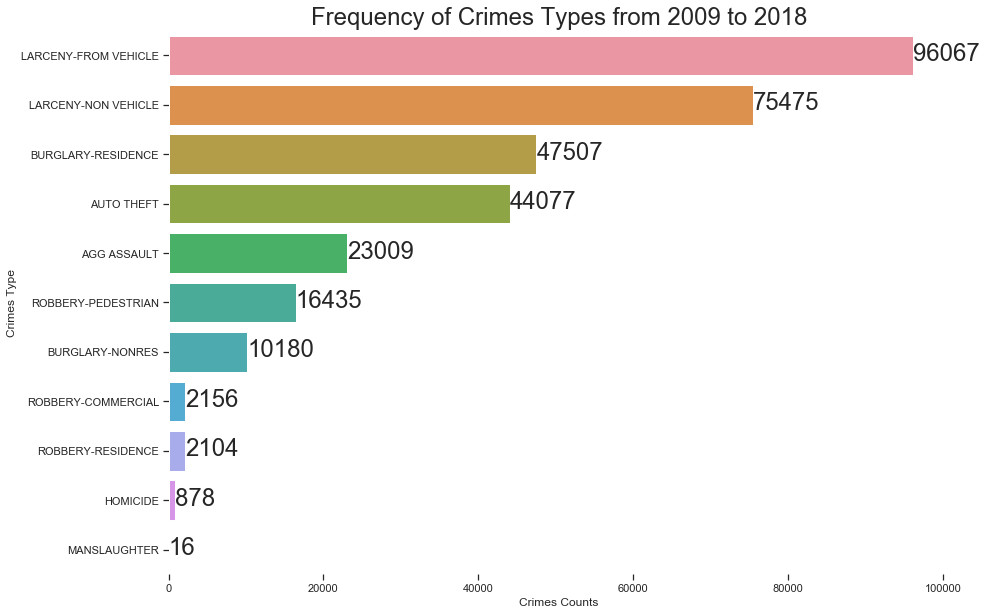

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(14, 10))

sns.set(font_scale = 2,style="darkgrid")
sns.color_palette("hls", 8)
sns.barplot(x="type_counts", y="UCR Literal", data=crime_types_count)

ax.set(ylabel="Crimes Type",
       xlabel="Crimes Counts",
      title="Frequency of Crimes Types from 2009 to 2018")
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x() + width,
            p.get_y() + 0.5,
            '{:1.0f}'.format(width),
            ) 
sns.despine(left=True, bottom=True)
plt.show()

# Top 50 Neighborhoods with the Most Crime from 2009 to 2018

In [12]:
s_crime_neighborhood = data[['Neighborhood']]

In [13]:
s_crime_neighborhood.head()

,Neighborhood
1970-01-01 00:00:00.000000000,Greenbriar
1970-01-01 00:00:00.000000001,Downtown
1970-01-01 00:00:00.000000002,Adamsville
1970-01-01 00:00:00.000000003,Lenox
1970-01-01 00:00:00.000000004,Greenbriar


In [14]:
crime_Neighborhood_count = pd.DataFrame(s_crime_neighborhood.groupby('Neighborhood').size().sort_values(ascending=False).rename('Neighborhood_counts').reset_index())

In [15]:
crime_Neighborhood_count.shape

(243, 2)

In [16]:
crime_Neighborhood_count.head()

,Neighborhood,Neighborhood_counts
0,Downtown,23377
1,Midtown,16561
2,Old Fourth Ward,9205
3,West End,7995
4,Lenox,5749


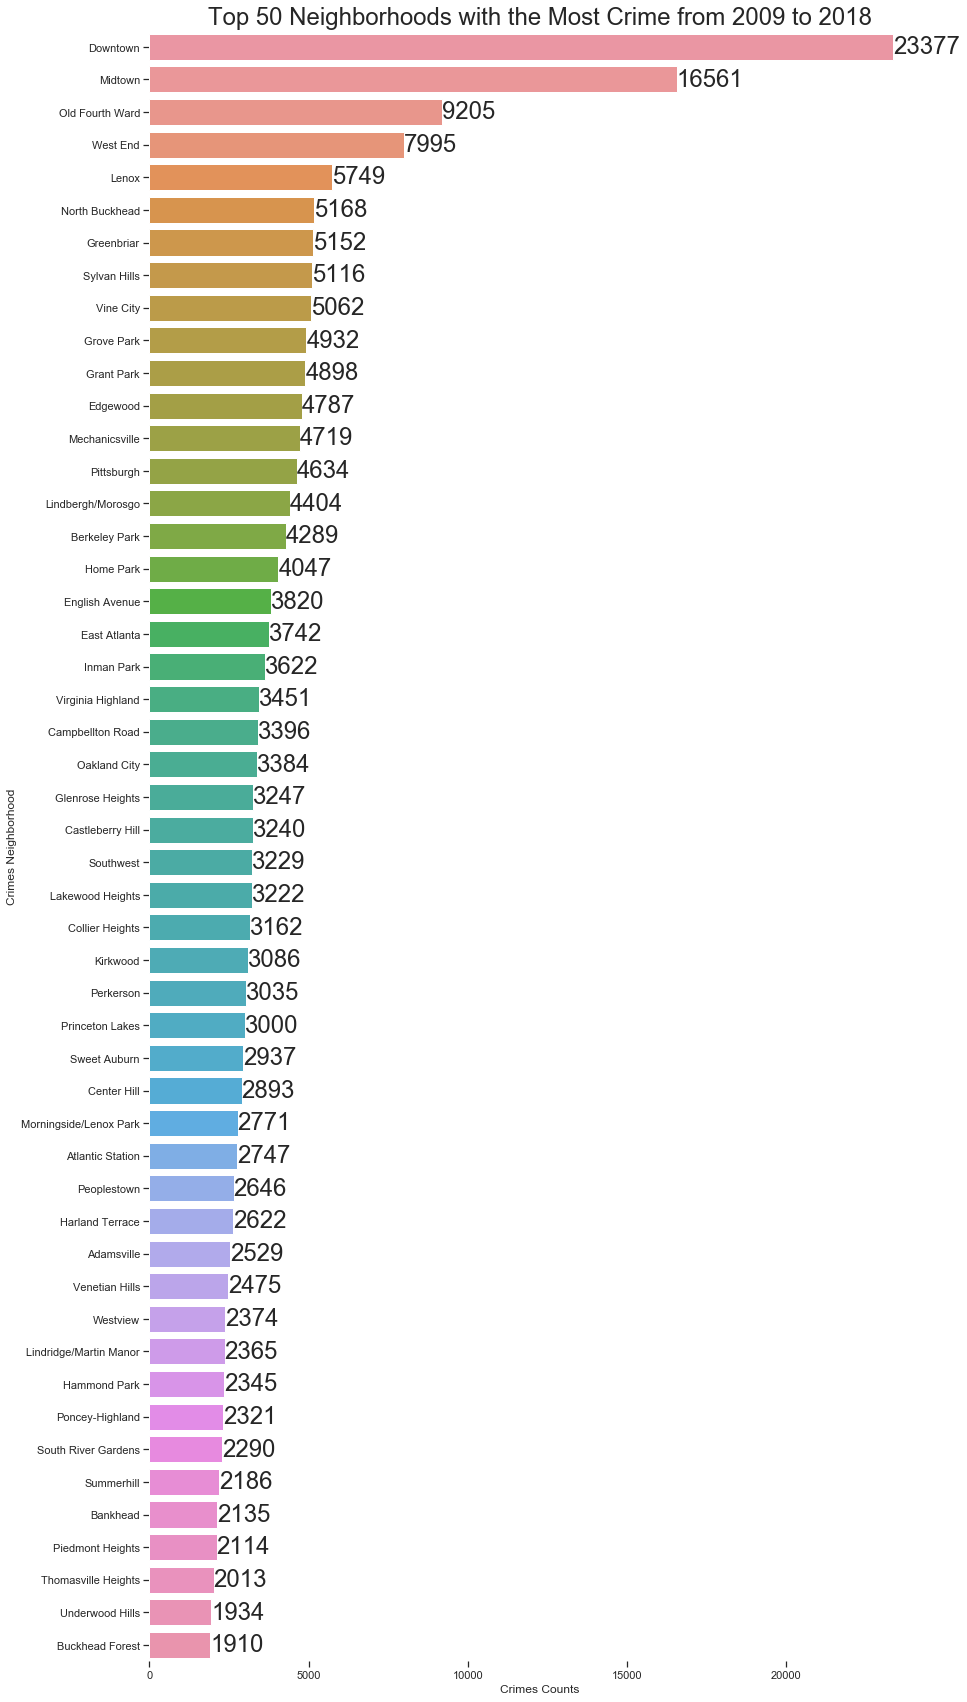

In [17]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(14, 30))

sns.set(font_scale = 2,style="darkgrid")
sns.color_palette("hls", 8)
sns.barplot(x="Neighborhood_counts", y="Neighborhood", data=crime_Neighborhood_count.iloc[:50,:])

ax.set(ylabel="Crimes Neighborhood",
       xlabel="Crimes Counts",
      title="Top 50 Neighborhoods with the Most Crime from 2009 to 2018")
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x() + width,
            p.get_y() + 0.6,
            '{:1.0f}'.format(width),
            ) 
sns.despine(left=True, bottom=True)
plt.show()

# Breakdown of Crime Downtown by Day

In [18]:
s_crime_Downtown = data[data['Neighborhood'] == 'Downtown']
# s_crime_Downtown = pd.DataFrame(s_crime_Downtown)
s_crime_Downtown.head()

,Occur Date,Neighborhood,UCR Literal,Day,Occur Time,Latitude,Longitude,UCR #,IBR Code,zipcode
1970-01-01 00:00:00.000000001,2009/1/1,Downtown,LARCENY-NON VEHICLE,Thursday,12:45,33.75320,-84.39201,630,2303,30303
1970-01-01 00:00:00.000000009,2008/12/31,Downtown,LARCENY-FROM VEHICLE,Wednesday,20:45,33.76269,-84.39702,640,2305,30313
1970-01-01 00:00:00.000000017,2008/12/31,Downtown,LARCENY-FROM VEHICLE,Wednesday,4:45,33.77023,-84.38815,640,2305,30308
1970-01-01 00:00:00.000000022,2009/1/1,Downtown,LARCENY-FROM VEHICLE,Thursday,9:45,33.76464,-84.39534,640,2305,30313
1970-01-01 00:00:00.000000028,2009/1/1,Downtown,LARCENY-NON VEHICLE,Thursday,15:45,33.76214,-84.38625,680,2307,30308


In [19]:
s_crime_Downtown.shape

(23377, 10)

In [20]:
def dayCrimeTypeInDowntown():
    dayList = []
    for i in ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
        day_data = data[data['Day'] == i]
#         Group by the crime type
        day_crime_type_Downtown = pd.DataFrame(day_data.groupby('UCR Literal').size().sort_values(ascending=False).rename('day_crime_Downtown_counts').reset_index())
        day_crime_count = np.array(day_crime_type_Downtown['day_crime_Downtown_counts']).squeeze().tolist()
        dayList.append(day_crime_count)
    return np.array(dayList).T

In [21]:
day_data = dayCrimeTypeInDowntown()

In [22]:
day_data[10].tolist()

[2, 1, 4, 3, 3, 2, 1]

In [23]:
(day_data/day_data.sum(axis = 0))[0]

array([0.29757041, 0.29558171, 0.29693137, 0.29487553, 0.297021  ,
       0.32215731, 0.31112087])

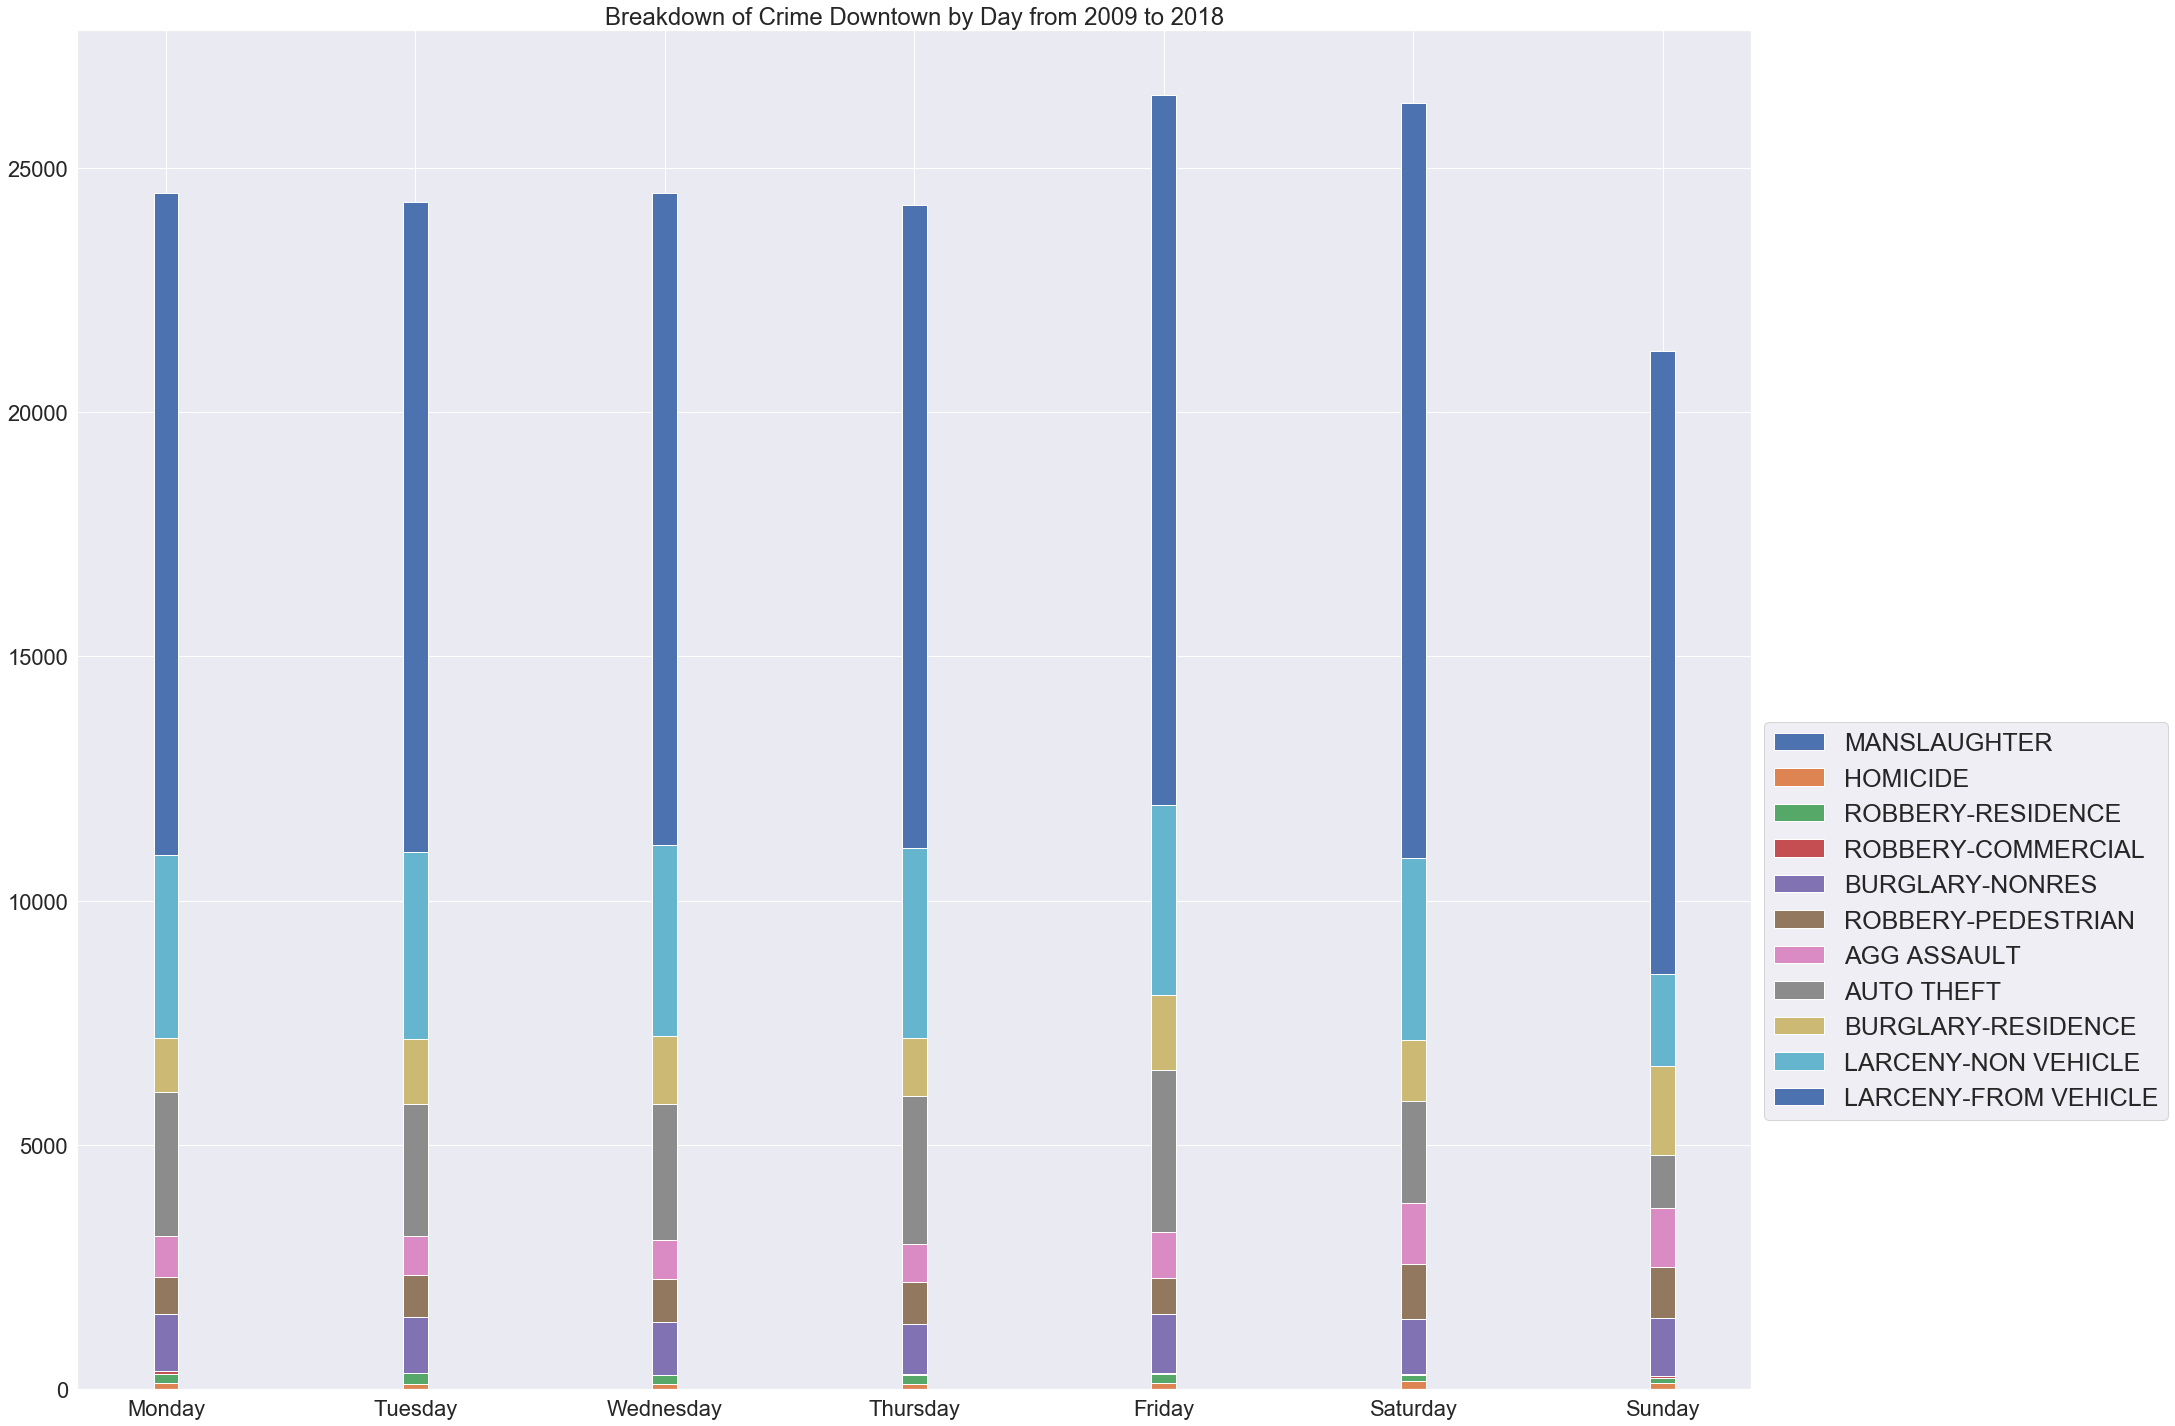

In [24]:
figure(num=None, figsize=(30, 25))
ind = np.arange(7)
width = 0.1 
plt.bar(ind, day_data[10], width)
plt.bar(ind, day_data[9], width, bottom= day_data[10])
plt.bar(ind, day_data[8], width,bottom= day_data[9])
plt.bar(ind, day_data[7], width,bottom= day_data[8])
plt.bar(ind, day_data[6], width,bottom= day_data[7])
plt.bar(ind, day_data[5], width,bottom= day_data[6])
plt.bar(ind, day_data[4], width,bottom= day_data[5])
plt.bar(ind, day_data[3], width,bottom= day_data[4])
plt.bar(ind, day_data[2], width,bottom= day_data[3])
plt.bar(ind, day_data[1], width,bottom= day_data[2])
p0 = plt.bar(ind, day_data[0], width,bottom= day_data[1])
plt.xticks(ind, ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
y = ['MANSLAUGHTER','HOMICIDE','ROBBERY-RESIDENCE','ROBBERY-COMMERCIAL','BURGLARY-NONRES','ROBBERY-PEDESTRIAN','AGG ASSAULT','AUTO THEFT','BURGLARY-RESIDENCE','LARCENY-NON VEHICLE','LARCENY-FROM VEHICLE']
plt.legend(y,bbox_to_anchor=(1, 0.5),prop={'size': 25})
plt.title('Breakdown of Crime Downtown by Day from 2009 to 2018')
plt.show()

# Training the linear Regression Model.

In [25]:
day_data

array([[13546, 13313, 13334, 13160, 14527, 15441, 12746],
       [10930, 10990, 11146, 11079, 11961, 10872,  8497],
       [ 7185,  7161,  7220,  7184,  8064,  7154,  6622],
       [ 6088,  5846,  5834,  5999,  6534,  5899,  4794],
       [ 3127,  3139,  3046,  2965,  3218,  3802,  3712],
       [ 2287,  2345,  2261,  2191,  2274,  2572,  2505],
       [ 1540,  1475,  1377,  1343,  1544,  1436,  1465],
       [  370,   332,   294,   312,   332,   305,   273],
       [  311,   332,   285,   289,   316,   289,   220],
       [  136,   106,   105,   104,   136,   158,   133],
       [    2,     1,     4,     3,     3,     2,     1]])

In [26]:
day_data.sum(axis = 0)

array([45522, 45040, 44906, 44629, 48909, 47930, 40968])

In [27]:
date =  pd.DataFrame(data[['Occur Date']].groupby('Occur Date').size().sort_values(ascending=False).rename('date_counts').reset_index())

In [28]:
data['Occur Date'] = pd.to_datetime(data['Occur Date'],format="%Y/%m/%d")

In [29]:
data['Occur Time'] = pd.to_datetime(data['Occur Time'],format="%H:%M")

In [30]:

def date_time(data):
    data['Year'] = data['Occur Date'].dt.year
    data['Month'] = data['Occur Date'].dt.month
    data['Day'] = data['Occur Date'].dt.day
    data['Hour'] = data['Occur Time'].dt.hour
    data['Day Of Week'] = data['Occur Time'].dt.dayofweek
    return data

In [31]:
new_data = date_time(data)

In [32]:
new_data.head()

,Occur Date,Neighborhood,UCR Literal,Day,Occur Time,Latitude,Longitude,UCR #,IBR Code,zipcode,Year,Month,Hour,Day Of Week
1970-01-01 00:00:00.000000000,2009-01-01,Greenbriar,LARCENY-NON VEHICLE,1,1900-01-01 11:45:00,33.68845,-84.49328,630,2303,30344,2009,1,11,0
1970-01-01 00:00:00.000000001,2009-01-01,Downtown,LARCENY-NON VEHICLE,1,1900-01-01 12:45:00,33.75320,-84.39201,630,2303,30303,2009,1,12,0
1970-01-01 00:00:00.000000002,2009-01-01,Adamsville,LARCENY-NON VEHICLE,1,1900-01-01 13:45:00,33.75735,-84.50282,630,2303,30311,2009,1,13,0
1970-01-01 00:00:00.000000003,2009-01-01,Lenox,LARCENY-NON VEHICLE,1,1900-01-01 14:45:00,33.84676,-84.36212,630,2303,30326,2009,1,14,0
1970-01-01 00:00:00.000000004,2009-01-01,Greenbriar,LARCENY-NON VEHICLE,1,1900-01-01 15:45:00,33.68677,-84.49773,630,2303,30344,2009,1,15,0


In [33]:
larcency_from_veh = new_data[new_data['UCR Literal']=='LARCENY-FROM VEHICLE']

In [34]:
crime_count = pd.DataFrame(larcency_from_veh.groupby('Year').size().rename('larcency_from_veh_counts').reset_index())


In [35]:
crime_count = crime_count[crime_count['Year']>2009]

In [36]:
x = crime_count['Year']
y = crime_count['larcency_from_veh_counts']

In [37]:
x

8     2010
9     2011
10    2012
11    2013
12    2014
13    2015
14    2016
15    2017
16    2018
Name: Year, dtype: int64

In [38]:
y

8      9176
9      8589
10     8825
11     9343
12     9460
13     9593
14     9995
15     9825
16    10221
Name: larcency_from_veh_counts, dtype: int64

Text(0,0.5,'Counts')

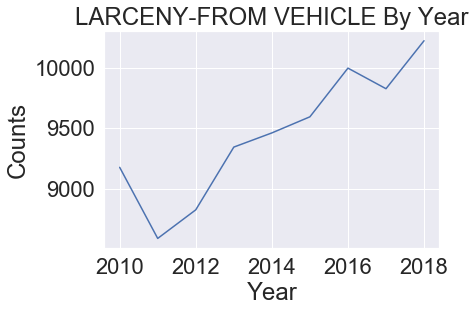

In [39]:
plt.plot(x,y)
plt.title('LARCENY-FROM VEHICLE By Year')
plt.xlabel('Year')
plt.ylabel('Counts')

In [40]:
downtown = new_data[(new_data['Neighborhood'] == 'Downtown') & (new_data['UCR Literal'] == 'LARCENY-FROM VEHICLE') & (new_data['Year'] >= 2009)]

In [41]:
downtown.head()

,Occur Date,Neighborhood,UCR Literal,Day,Occur Time,Latitude,Longitude,UCR #,IBR Code,zipcode,Year,Month,Hour,Day Of Week
1970-01-01 00:00:00.000000022,2009-01-01,Downtown,LARCENY-FROM VEHICLE,1,1900-01-01 09:45:00,33.76464,-84.39534,640,2305,30313,2009,1,9,0
1970-01-01 00:00:00.000000220,2009-01-01,Downtown,LARCENY-FROM VEHICLE,1,1900-01-01 15:45:00,33.76340,-84.38808,640,2305,30308,2009,1,15,0
1970-01-01 00:00:00.000000233,2009-01-02,Downtown,LARCENY-FROM VEHICLE,2,1900-01-01 04:45:00,33.75757,-84.38670,640,2305,30303,2009,1,4,0
1970-01-01 00:00:00.000000235,2009-01-02,Downtown,LARCENY-FROM VEHICLE,2,1900-01-01 06:45:00,33.75079,-84.38987,640,2305,30303,2009,1,6,0
1970-01-01 00:00:00.000000272,2009-01-02,Downtown,LARCENY-FROM VEHICLE,2,1900-01-01 19:45:00,33.74683,-84.39005,640,2305,30303,2009,1,19,0


In [42]:
month_crime_count = pd.DataFrame((downtown[['Month']]).groupby('Month').size().rename('counts').reset_index())

In [43]:
downtown['Year'].unique().tolist()

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [44]:
ys = []
for i in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]:
    downtown_year = downtown[downtown['Year'] == i]
    downtown_month = pd.DataFrame((downtown_year[['Month']]).groupby('Month').size().rename('counts').reset_index())
    x = downtown_month['Month']
    y = downtown_month['counts']
    ys.append(y)
#     plt.plot(x,y)

In [45]:
temp = []
ys = np.array(ys)

# for i in range(10):
#     temp.append(ys[i].flatten())

In [46]:
ys = ys.reshape(1,120)[0].tolist()

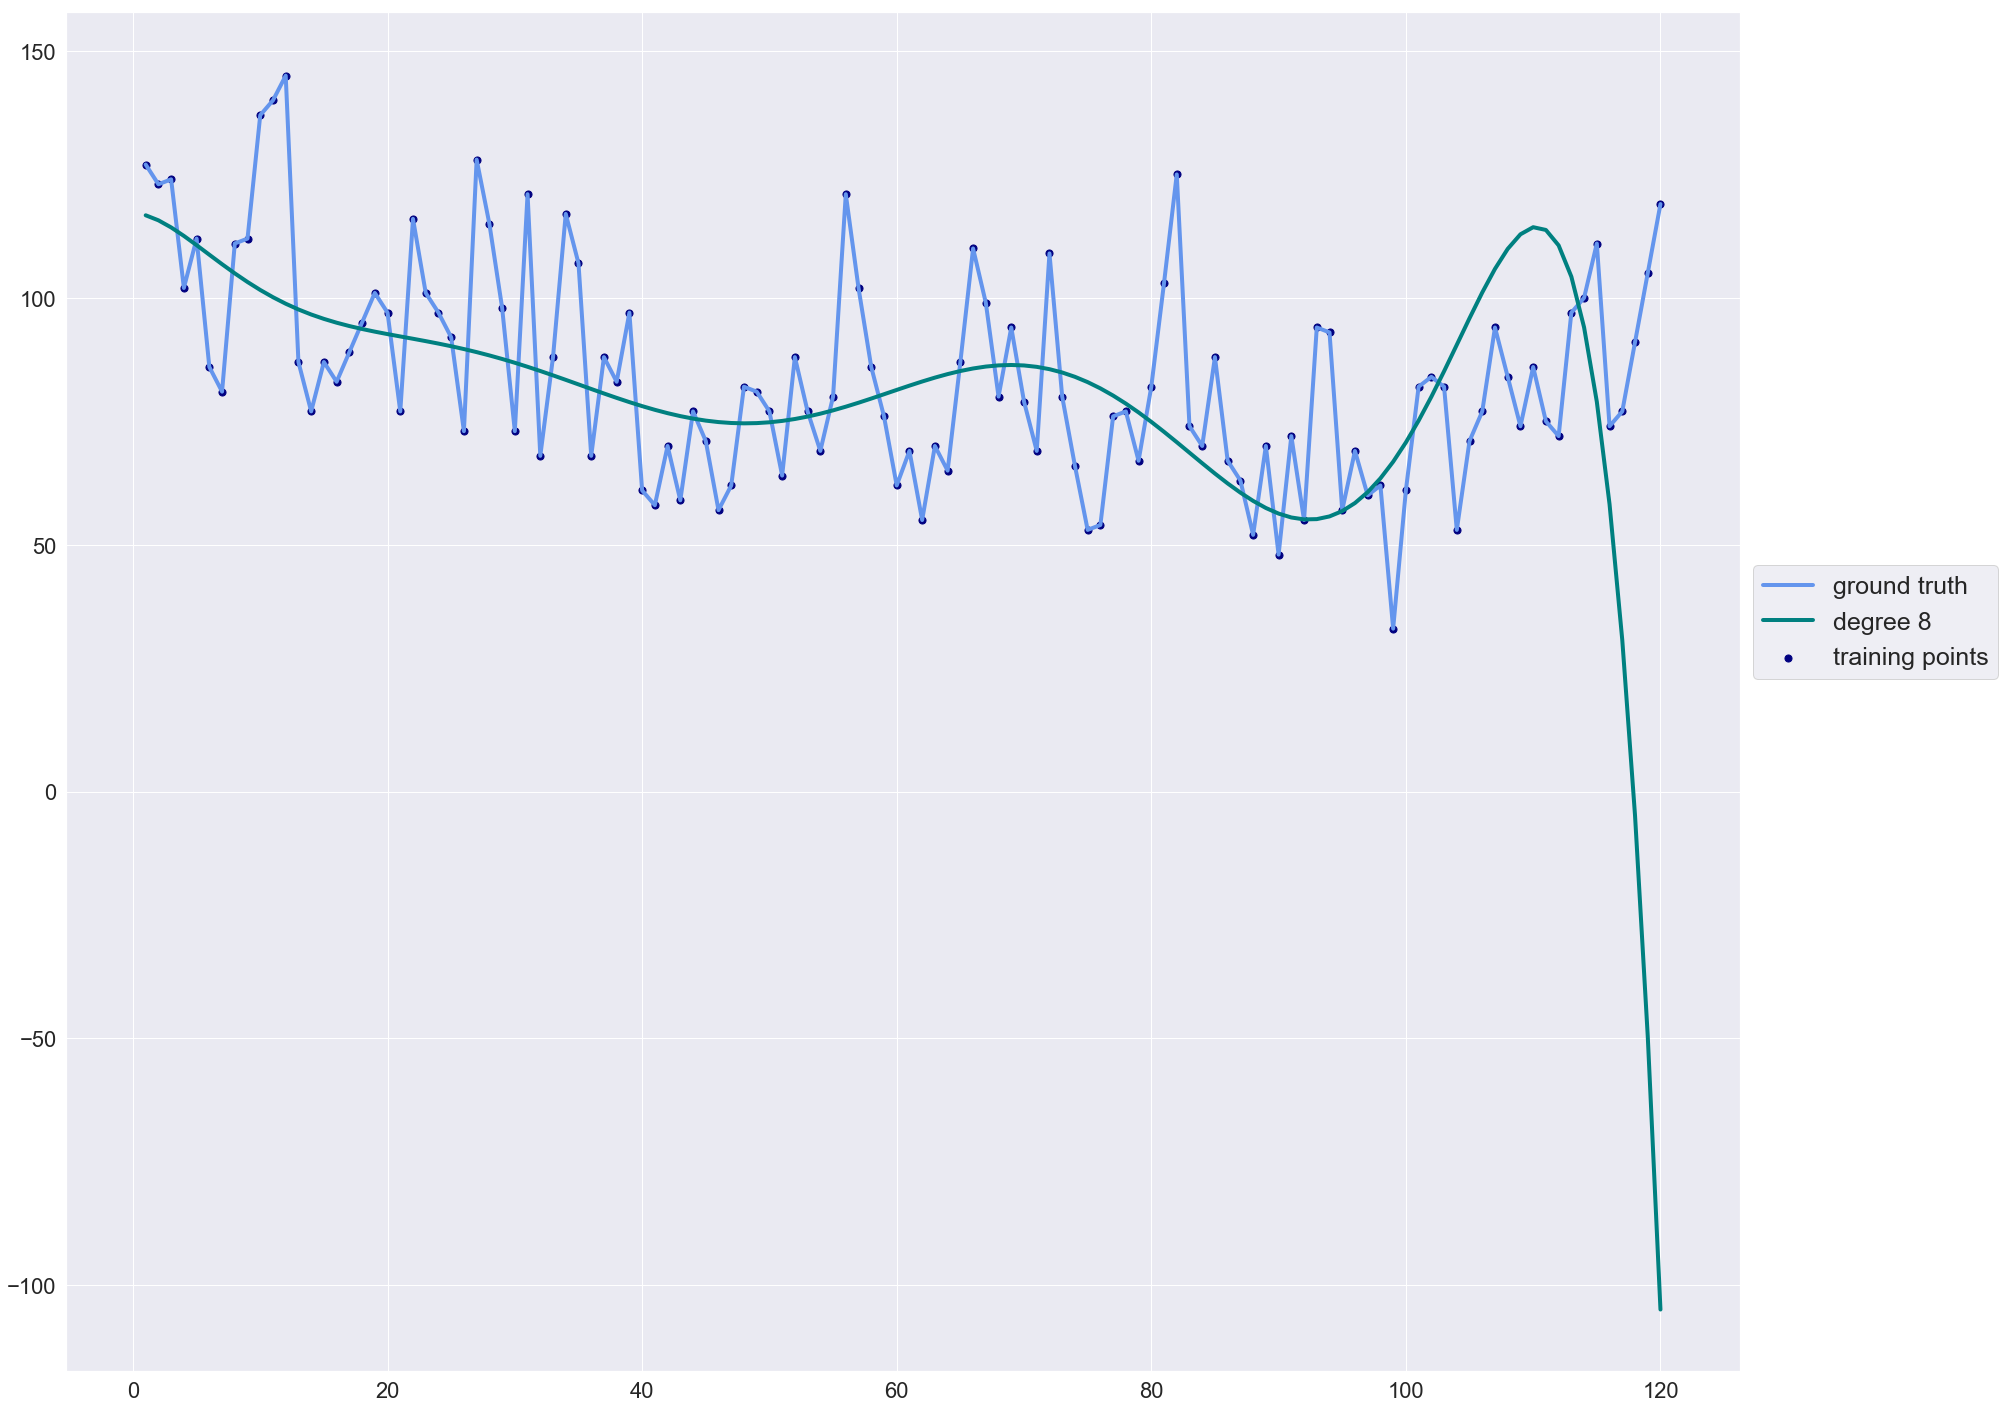

In [47]:
from sklearn.linear_model import Ridge,BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
# KernelRidge 4
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
figure(num=None, figsize=(30, 25))
x = np.linspace(1,120,120)
# rng = np.random.RandomState(0)
# rng.shuffle(x)
X = x[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 4
x_plot = np.linspace(1,120,120)
x_plot = x_plot[:, np.newaxis]
plt.plot(x_plot, ys, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, ys, color='navy', s=50, marker='o', label="training points")
for count, degree in enumerate([8]):
    model =  make_pipeline(PolynomialFeatures(degree), linear_model.RANSACRegressor())
    model.fit(X, ys)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
#     plt.xlabel(temp)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5),prop={'size': 25})
plt.show()

In [48]:
temp = []
for i in np.linspace(9,18,10):
    for j in np.linspace(1,12,12):
        temp.append(str(int(i))+'/' + str(int(j)))
    

In [49]:
test_data = pd.read_csv("test.csv")

In [50]:
test_data['Occur Date'] = pd.to_datetime(test_data['Occur Date'],format="%Y/%m/%d")

In [51]:
test_data['Occur Time'] = pd.to_datetime(test_data['Occur Time'],format="%H:%M")

In [52]:
test_data = date_time(test_data)

In [53]:
downtown_test_data_LFV = test_data[(test_data['Neighborhood'] == 'Downtown') & (test_data['UCR Literal'] == 'LARCENY-FROM VEHICLE')]

In [54]:

downtown_month_test_data_LFV_count = pd.DataFrame((downtown_test_data_LFV[['Month']]).groupby('Month').size().rename('counts').reset_index())

In [55]:
downtown_month_test_data_LFV_count

,Month,counts
0,1,71
1,2,54
2,3,36
3,4,51
4,5,77
5,6,73
6,7,84
7,8,59
8,12,3


In [56]:
x_test = np.linspace(121,128,8)
x_test = x_test[:, np.newaxis]
y_pred = model.predict(x_test)

In [57]:
y_pred

array([ -172.61520374,  -254.41824922,  -352.26140517,  -468.29133149,
        -604.85983748,  -764.53788127,  -950.13022526, -1164.69076631])

In [58]:
y_test = downtown_month_test_data_LFV_count['counts']
y_test = y_test[0:8]

In [59]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 733.8364552600406


In [60]:
r2_score(y_test, y_pred) 

-2431.767724740014

In [61]:
day_crime_count = pd.DataFrame((downtown[['Day']]).groupby('Day').size().rename('counts').reset_index())

In [62]:
yd = []
for i in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]:
    downtown_year = downtown[downtown['Year'] == i]
    downtown_day = pd.DataFrame((downtown_year[['Day']]).groupby('Day').size().rename('counts').reset_index())
#     x = downtown_month['Day']
    y = downtown_day['counts']
    yd.append(y)
#     plt.plot(x,y)

In [63]:
yd = np.array(yd).flatten()
yd.shape

(310,)

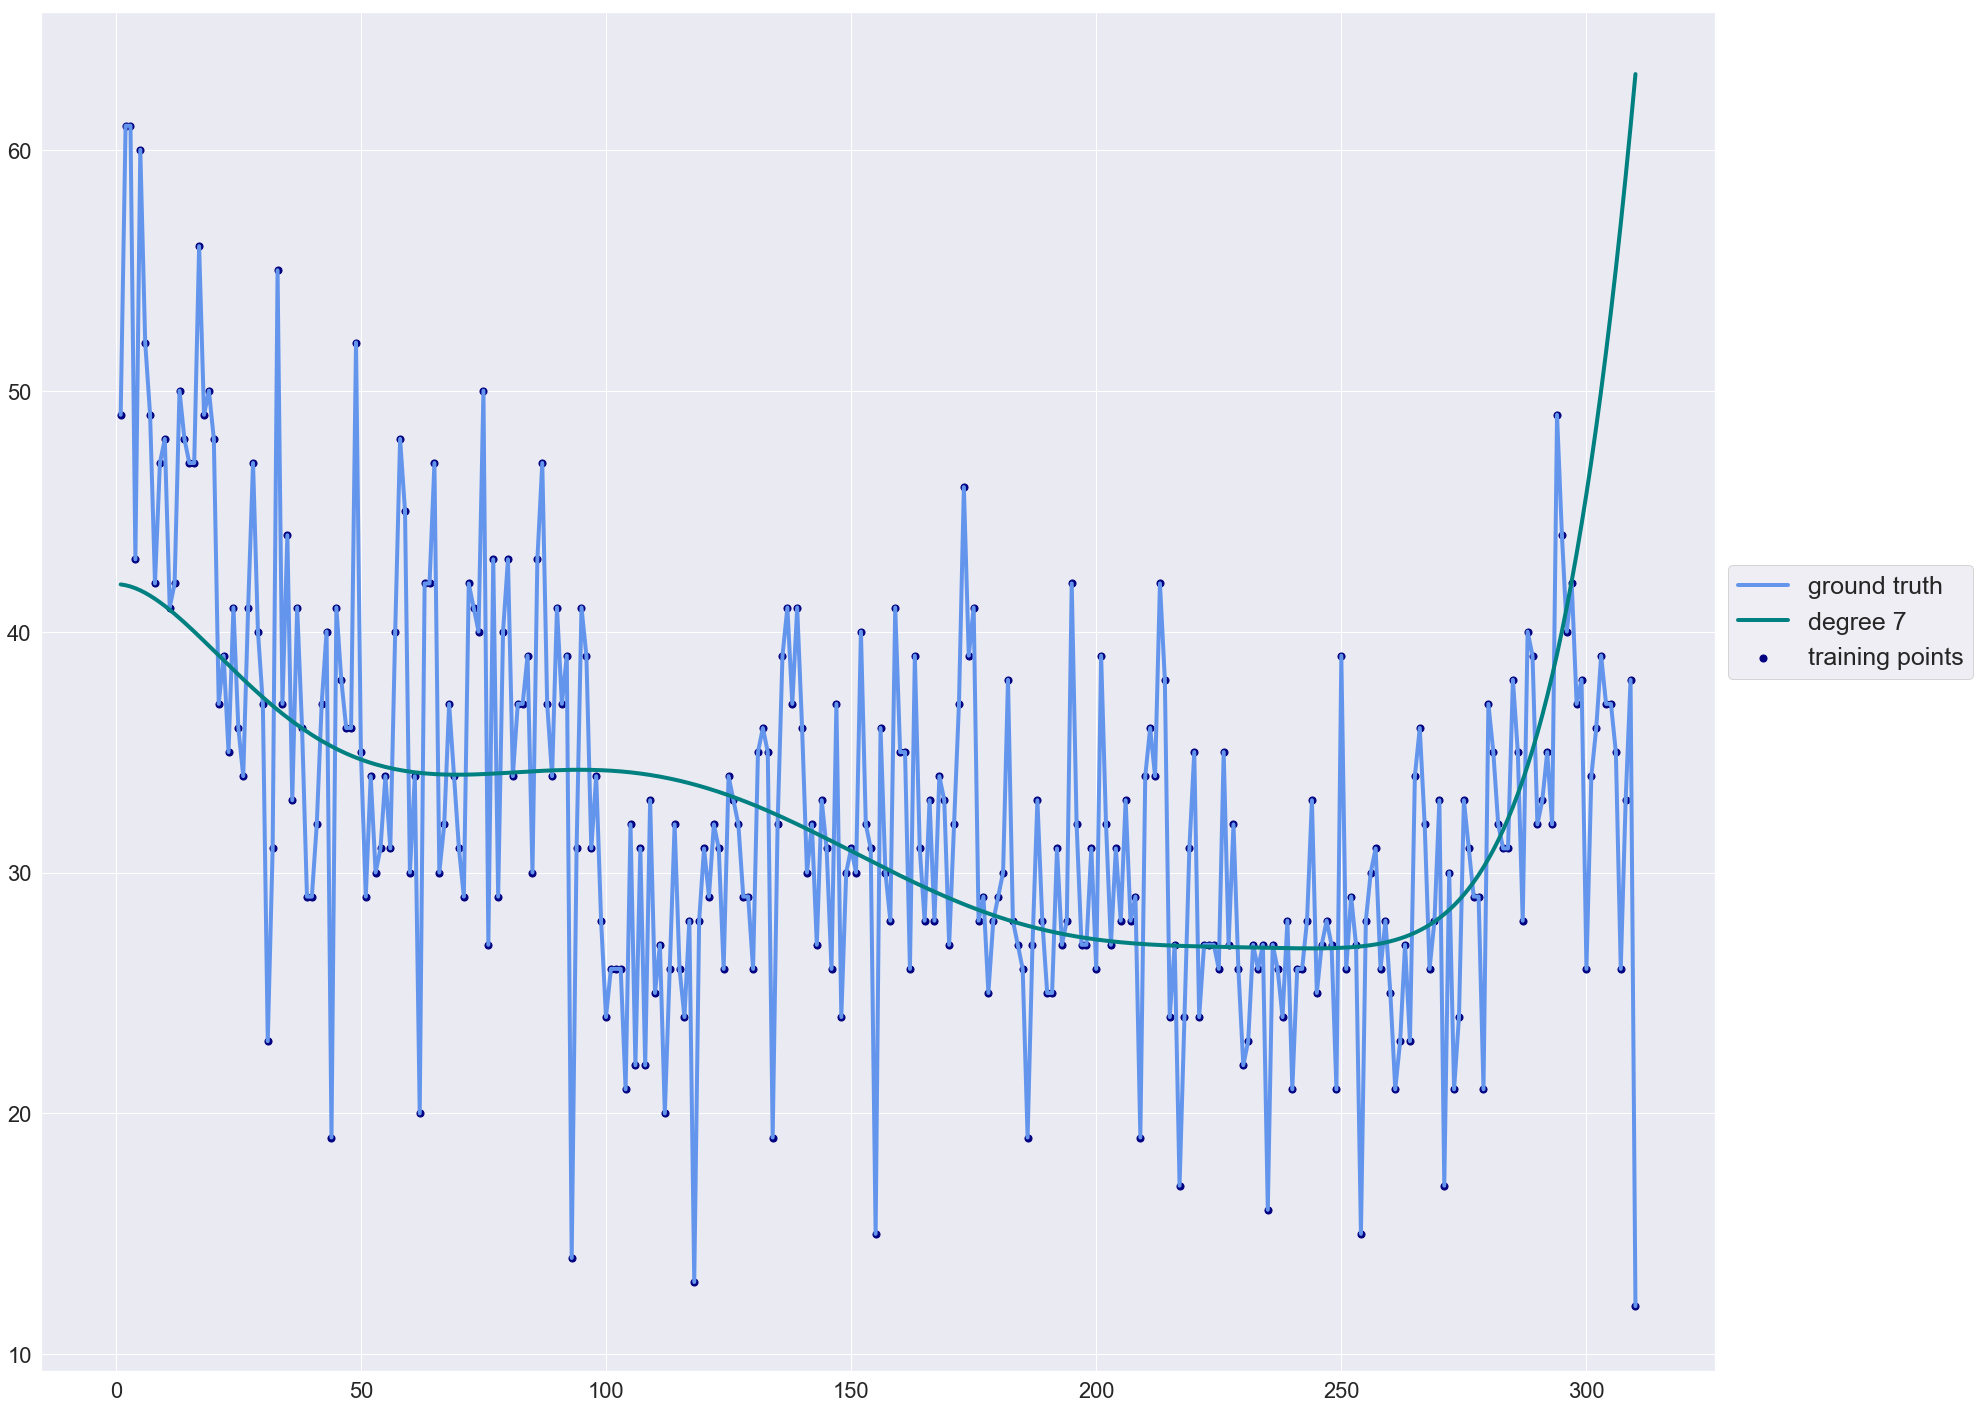

In [64]:
from sklearn.linear_model import Ridge,BayesianRidge,LogisticRegression,LinearRegression, TheilSenRegressor,RANSACRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
# KernelRidge 4
# RANSACRegressor 3
# TheilSenRegressor 4
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
figure(num=None, figsize=(30, 25))
x = np.linspace(1,310,310)
# rng = np.random.RandomState(0)
# rng.shuffle(x)
X = x[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 4
x_plot = np.linspace(1,310,310)
x_plot = x_plot[:, np.newaxis]
plt.plot(x_plot, yd, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, yd, color='navy', s=50, marker='o', label="training points")
for count, degree in enumerate([7]):
    model =  make_pipeline(PolynomialFeatures(degree), RANSACRegressor())
    model.fit(X, yd)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
#     plt.xlabel(temp)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5),prop={'size': 25})

plt.show()

In [65]:
y = yd
X = np.linspace(1,len(yd),len(yd))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = BayesianRidge()
lm.fit(X,y)
# clf.fit(X, y)
# coeff_df = pd.DataFrame(clf.coef_,X.columns,columns=['Coefficient'])
predictions = lm.predict(X_test)

In [66]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8.223214025683074


In [67]:
pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': predictions.flatten()}).head()

,Actual,Predicted
0,24,30.227049
1,38,30.502021
2,29,37.376318
3,29,28.027274
4,28,31.287655


In [68]:
downtown_day_test_data_LFV_count = pd.DataFrame((downtown_test_data_LFV[['Day']]).groupby('Day').size().rename('counts').reset_index())



In [69]:
x_test = np.linspace(311,341,31)
x_test = x_test[:, np.newaxis]
y_pred = model.predict(x_test)

In [70]:

y_pred

array([ 65.43421513,  67.84143657,  70.36988742,  73.02432844,
        75.80965938,  78.73092169,  81.79330143,  85.00213214,
        88.36289774,  91.88123545,  95.56293886,  99.41396087,
       103.44041678, 107.64858741, 112.04492219, 116.63604235,
       121.42874412, 126.430002  , 131.64697199, 137.08699495,
       142.75759996, 148.66650766, 154.82163377, 161.23109249,
       167.90320004, 174.84647821, 182.06965795, 189.58168299,
       197.39171351, 205.50912986, 213.94353631])

In [71]:
y_test = downtown_day_test_data_LFV_count['counts']
y_test = np.array(y_test)

y_test

array([16, 20, 20, 12, 12, 11, 18, 15, 26, 13, 15, 19, 12, 17, 15, 23, 16,
       15, 20, 19, 22,  9, 19, 15, 20, 22, 17, 16, 17, 11,  6],
      dtype=int64)

In [72]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 117.30136245052512


In [73]:
r2_score(y_test, y_pred) 

-740.3649280708811

In [74]:
ymd = []
for i in [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]:
    downtown_year = downtown[downtown['Year'] == i]
    for j in np.linspace(1,12,12):
        downtown_month = downtown_year[downtown_year['Month'] == j]
        downtown_day = pd.DataFrame((downtown_month[['Day']]).groupby('Day').size().rename('counts').reset_index())

#         x = downtown_month['Month']
        y = downtown_day['counts']
        ymd.append(y)
#         plt.plot(x,y)

In [75]:
a = np.array(ymd[0]).flatten()
for i in np.linspace(1,119,119):
    b = np.array(ymd[int(i)]).flatten()
    a = np.concatenate((a, b), axis=None)

In [76]:
ymd = a
max(ymd)

13

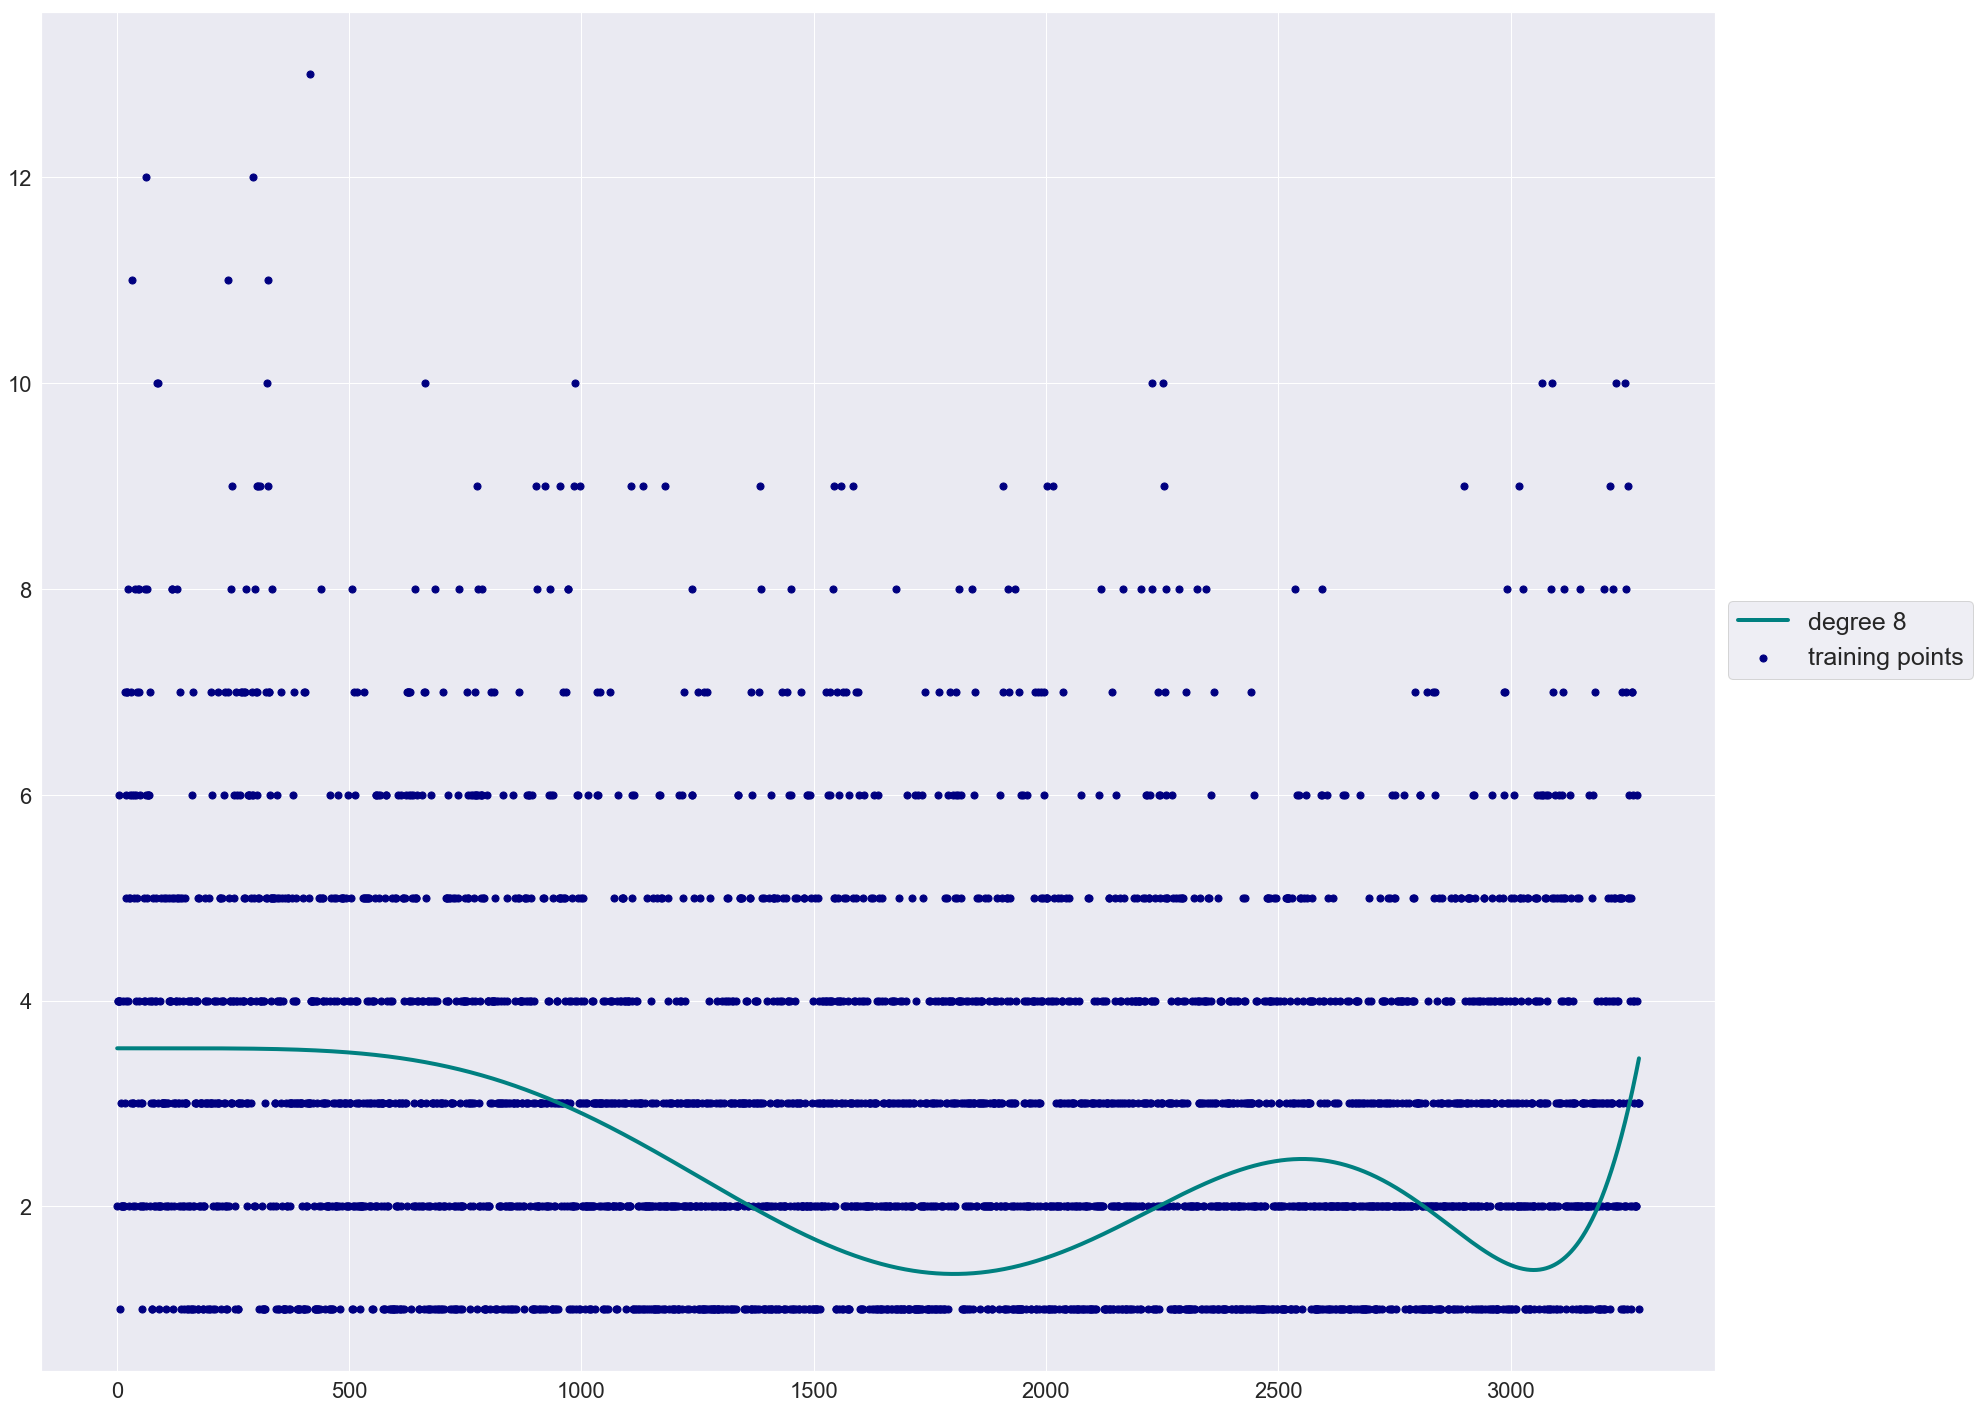

In [77]:
from sklearn.linear_model import Ridge,BayesianRidge,LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
# KernelRidge 4
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
figure(num=None, figsize=(30, 25))
x = np.linspace(1,len(ymd),len(ymd))
# rng = np.random.RandomState(0)
# rng.shuffle(x)
X = x[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 4
x_plot = np.linspace(1,len(ymd),len(ymd))
x_plot = x_plot[:, np.newaxis]
# plt.plot(x_plot, ymd, color='cornflowerblue', linewidth=lw,label="ground truth")
plt.scatter(x, ymd, color='navy', s=50, marker='o', label="training points")
for count, degree in enumerate([8]):
    model =  make_pipeline(PolynomialFeatures(degree), linear_model.RANSACRegressor())
    model.fit(X, ymd)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
#     plt.xlabel(temp)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5),prop={'size': 25})

plt.show()

In [78]:
y = ymd
X = np.linspace(1,len(ymd),len(ymd))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X, y)
# coeff_df = pd.DataFrame(clf.coef_,X.columns,columns=['Coefficient'])
predictions = lm.predict(X_test)

In [79]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 1.917596611642804


In [80]:
pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': predictions.flatten()})


,Actual,Predicted
0,7,2.898386
1,1,2.837215
2,5,3.298434
3,10,2.946761
4,5,2.954439
5,1,2.908880
6,2,3.190424
7,12,3.447908
8,1,2.994367
9,7,3.457378


In [81]:
y = ymd
X = np.linspace(1,len(ymd),len(ymd))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = BayesianRidge()
lm.fit(X, y)
# coeff_df = pd.DataFrame(clf.coef_,X.columns,columns=['Coefficient'])
predictions = lm.predict(X_test)

In [82]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 1.7451152133152774


In [83]:
r2_score(y_test, predictions)

0.017480864033743715

In [84]:
pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': predictions.flatten()}).head()

,Actual,Predicted
0,1,2.845040
1,2,3.480456
2,2,2.896200
3,2,2.723021
4,1,2.992383


x = np.linspace(3277,3297,20)
x = x[:, np.newaxis]
lm.predict(x)

pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': predictions.flatten()}).head()

In [92]:
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import Ridge,BayesianRidge,LogisticRegression,LinearRegression, TheilSenRegressor,RANSACRegressor, SGDRegressor
seed = 2017
ensemble = SuperLearner(scorer= mean_squared_error, random_state=seed, verbose=2)
ensemble.add([BayesianRidge() , RANSACRegressor()])
ensemble.add_meta(SGDRegressor())
y = ymd
X = np.linspace(1,len(ymd),len(ymd))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
ensemble.fit(X_train, y_train)
y_plot = ensemble.predict(X_test)


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers


C:\Users\luoha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [93]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_plot)))

RMSE: 1.8832412033191128


In [94]:
r2_score(y_test, y_plot)

0.012466333193045243

In [96]:
pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_plot.flatten()}).head(10)

,Actual,Predicted
0,3,3.379057
1,3,3.464189
2,1,3.336491
3,4,3.125308
4,4,3.467952
5,5,3.556376
6,1,3.196094
7,4,2.899308
8,3,3.604586
9,1,3.148590


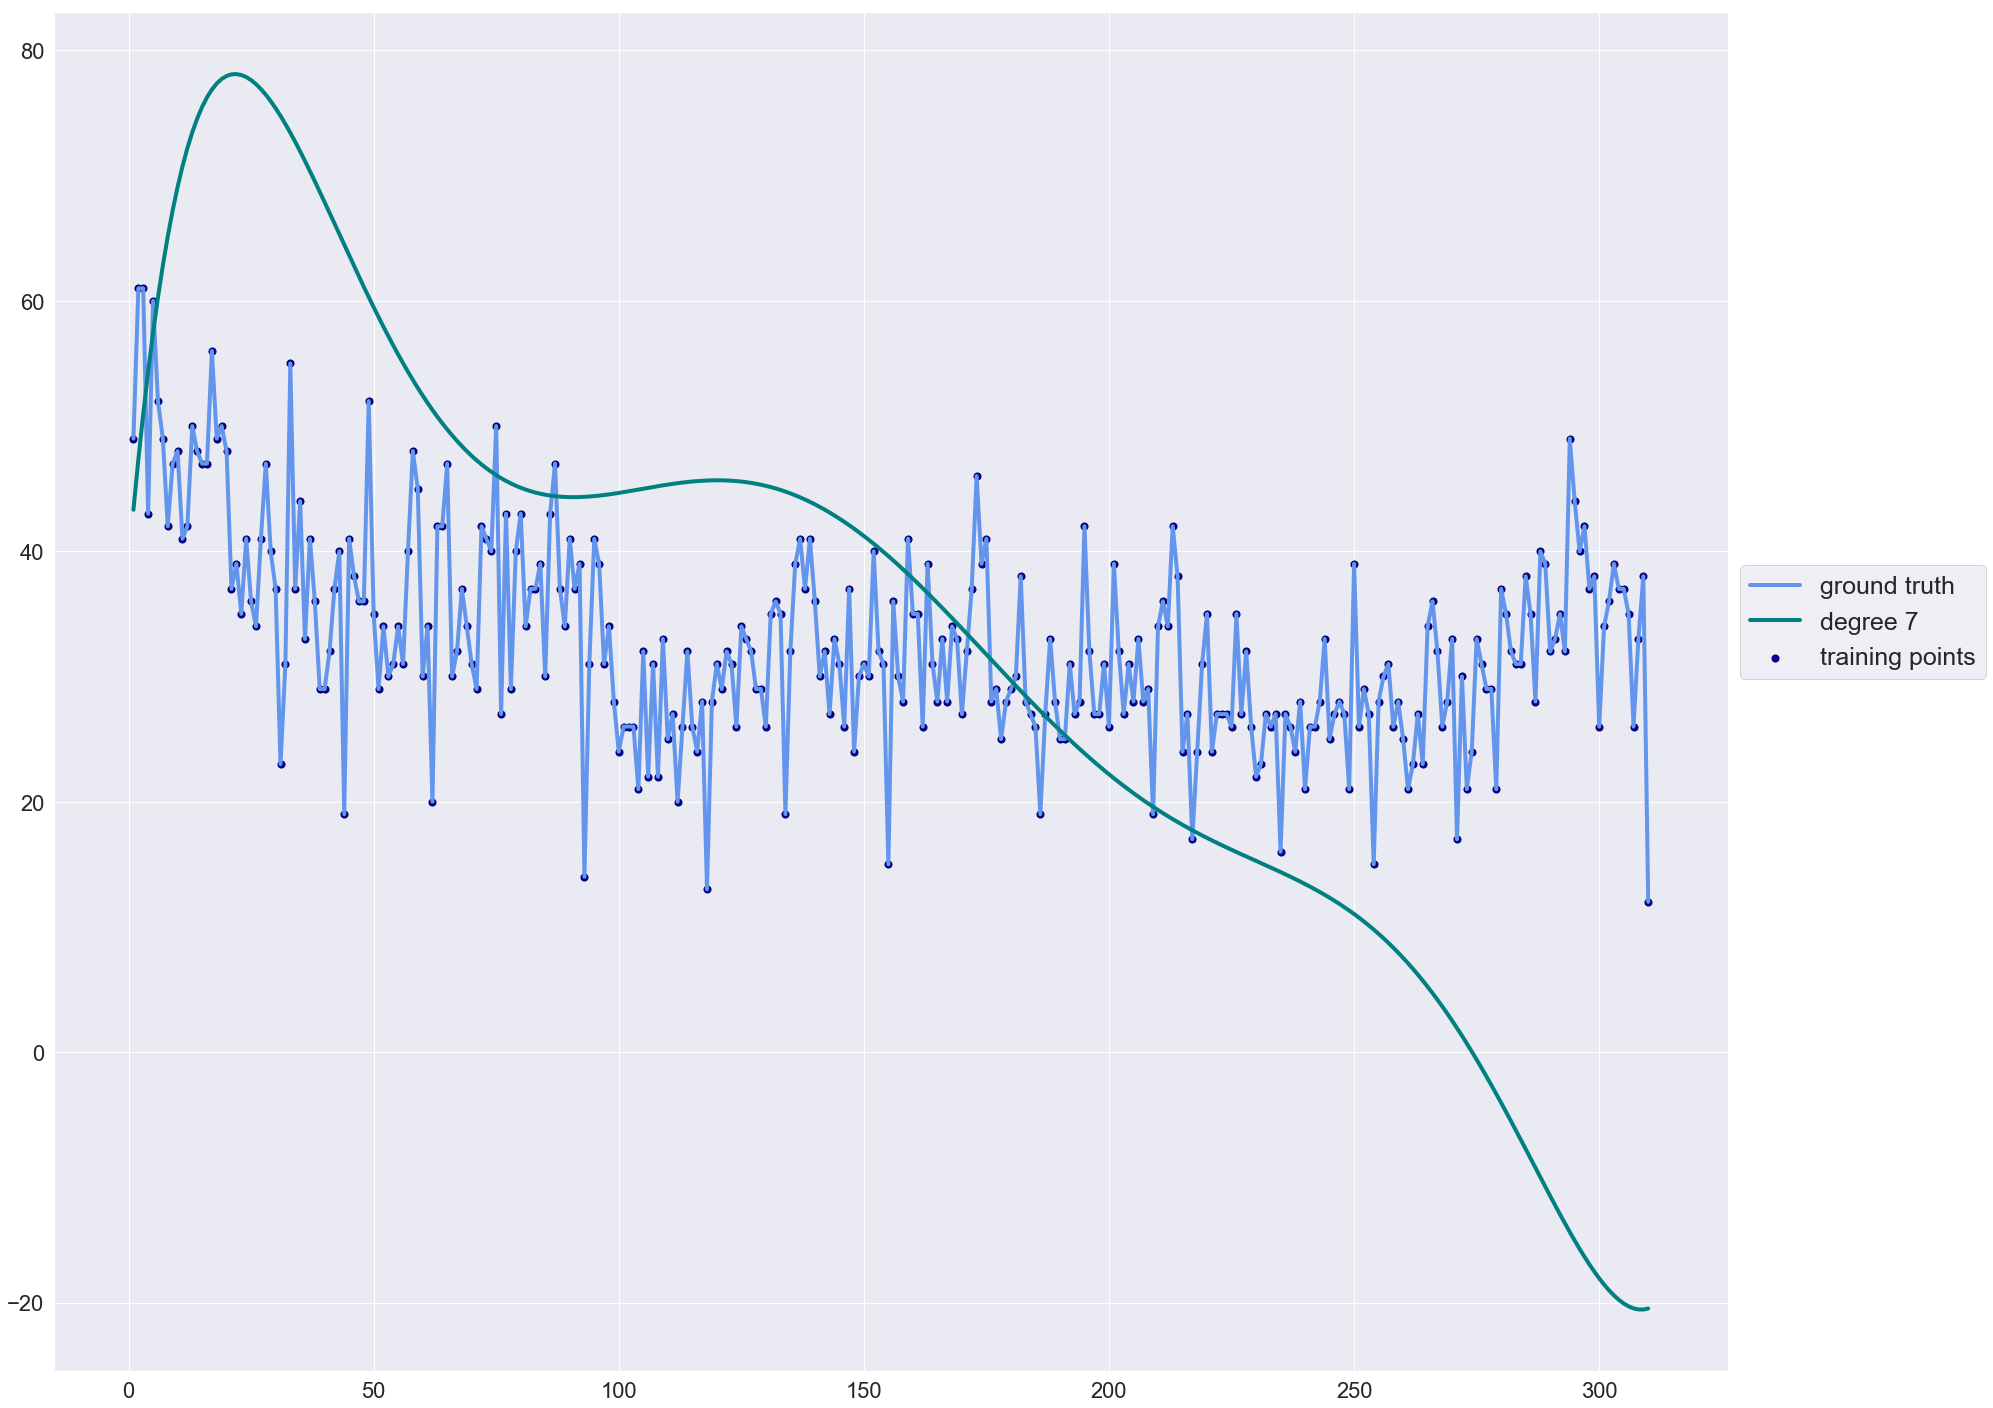

In [97]:
figure(num=None, figsize=(30, 25))
x = np.linspace(1,310,310)
# rng = np.random.RandomState(0)
# rng.shuffle(x)
X = x[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 4
x_plot = np.linspace(1,310,310)
x_plot = x_plot[:, np.newaxis]
plt.plot(x_plot, yd, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, yd, color='navy', s=50, marker='o', label="training points")
for count, degree in enumerate([7]):
    model =  make_pipeline(PolynomialFeatures(degree), BayesianRidge())
    model.fit(X, yd)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
#     plt.xlabel(temp)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5),prop={'size': 25})

plt.show()


Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:00

Predicting 2 layers


C:\Users\luoha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


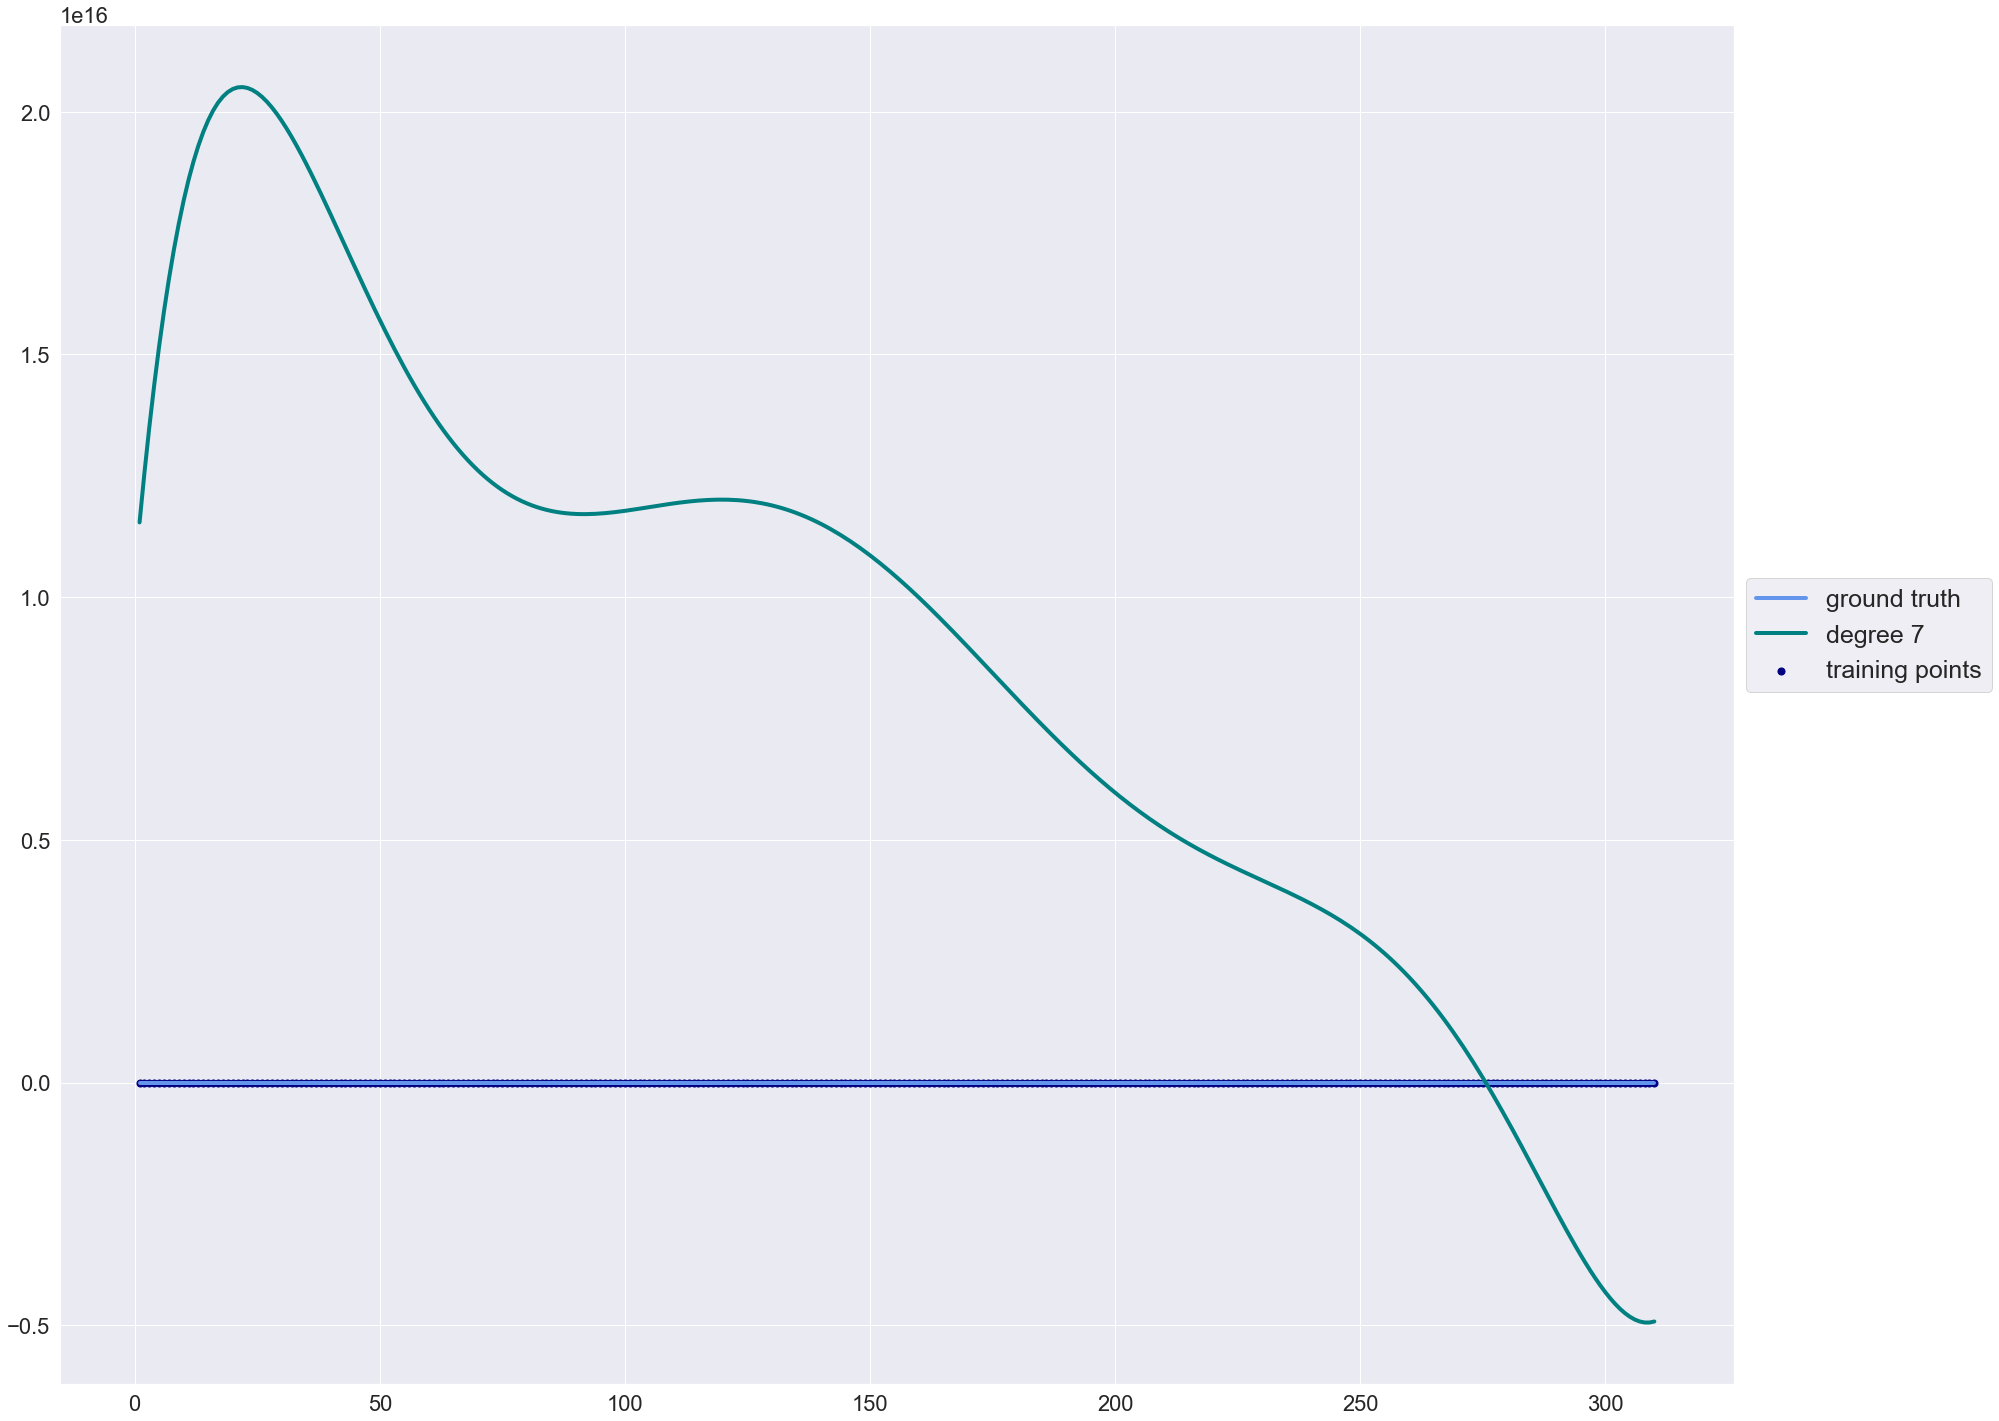

In [98]:
figure(num=None, figsize=(30, 25))
x = np.linspace(1,310,310)
# rng = np.random.RandomState(0)
# rng.shuffle(x)
X = x[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 4
x_plot = np.linspace(1,310,310)
x_plot = x_plot[:, np.newaxis]
plt.plot(x_plot, yd, color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, yd, color='navy', s=50, marker='o', label="training points")
for count, degree in enumerate([7]):
    ensemble = SuperLearner(scorer= mean_squared_error, random_state=seed, verbose=2)
    ensemble.add([BayesianRidge() , RANSACRegressor()])
    ensemble.add_meta(SGDRegressor())
    model =  make_pipeline(PolynomialFeatures(degree), ensemble)
    model.fit(X, yd)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
#     plt.xlabel(temp)
plt.legend(loc='lower left',bbox_to_anchor=(1, 0.5),prop={'size': 25})

plt.show()